# Non Graded Challenge 12

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# load dataset Covid-19 di Indonesia
data = pd.read_csv('E:\Hacktiv8\learning_journal\Phase_0\week_3\covid_19_indonesia_time_series_all.csv')
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [3]:
#tipe data dari setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
#mengecek missing value
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

In [5]:
#membuat copy dataset
data1 = data.copy()

In [6]:
# menghapus kolom City or Regency karena isinya semuanya berisi missing value/tidak terisi
data1.drop(['City or Regency'], axis=1, inplace=True)
data1

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


Mengisi missing value pada kolom Province, Island, Time zone, Special Status dengan menggunakan 'none' karena data tersebut berupa object

In [7]:
data1['Province'].fillna('None', inplace=True)
data1['Island'].fillna('None', inplace=True)
data1['Time Zone'].fillna('None', inplace=True)
data1['Special Status'].fillna('None', inplace=True)

Mengisi missing value dengan '0' pada data yang bertipe float

In [8]:
data1['Total Cities'].fillna('0', inplace=True)
data1['Total Urban Villages'].fillna('0', inplace=True)
data1['Total Rural Villages'].fillna('0', inplace=True)
data1['Growth Factor of New Cases'].fillna('0', inplace=True)
data1['Growth Factor of New Deaths'].fillna('0', inplace=True)

In [9]:
#mengecek jumlah missing value secara keseluruhan dataset
data1.isnull().sum().sum()

0

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  Province                     21759 non-null  object 
 13  Country         

##
- Lakukan hypothesis testing terhadap dataset diatas.
- Ambil kesimpulan dari hasil analisa.

## one sample tailed test

Selama 2 tahun terakhir rata-rata kasus baru harian Covid-19 di Indonesia mencapai 14.000 kasus, tetapi dalam setahun terakhir rata-rata kasus baru harian Covid-19 di Indonesia mencapai 13.241 kasus. Apakah berarti terjadi penurunan kasus baru secara signifikan?

In [56]:
data1.sample(10)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,cases
12993,3/27/2021,ID-AC,Aceh,21,2,6,13,9833,395,8043,...,4.00,1873.93,0.38,75.28,7.53,4.02%,81.80%,1.4,0,21
6661,9/27/2020,ID-BE,Bengkulu,45,0,11,34,645,34,403,...,22.51,322.57,0.00,17.00,1.70,5.27%,62.48%,4.5,0,45
12015,2/27/2021,ID-BT,Banten,37,7,178,-148,29426,878,29971,...,3.45,2744.35,0.65,81.88,8.19,2.98%,101.85%,0.16,2.33,37
10321,1/9/2021,ID-NT,Nusa Tenggara Timur,31,1,16,14,2481,56,1495,...,5.73,458.48,0.18,10.35,1.03,2.26%,60.26%,0.61,0,31
16268,6/28/2021,ID-MA,Maluku,119,1,1,117,8466,140,7601,...,64.43,4583.41,0.54,75.79,7.58,1.65%,89.78%,2.33,1,119
8568,11/20/2020,ID-MA,Maluku,10,0,20,-10,4212,57,3621,...,5.41,2280.34,0.00,30.86,3.09,1.35%,85.97%,0.2,0,10
18699,9/6/2021,ID-BA,Bali,208,17,354,-163,108763,3633,100043,...,49.33,25796.63,4.03,861.68,86.17,3.34%,91.98%,0.83,0.94,208
4024,7/13/2020,ID-RI,Riau,3,0,3,0,246,11,224,...,0.49,40.50,0.00,1.81,0.18,4.47%,91.06%,3,1,3
4915,8/8/2020,IDN,Indonesia,2277,65,1749,463,123503,5658,79306,...,8.59,465.72,0.25,21.34,2.13,4.58%,64.21%,0.92,0.9,2277
4902,8/7/2020,ID-ST,Sulawesi Tengah,1,0,1,0,216,7,195,...,0.34,73.08,0.00,2.37,0.24,3.24%,90.28%,0,1,1


Mencari rata-rata dari kasus baru harian setahun terakhir

In [68]:
# membuat tabel baru
data1['cases'] = data1['New Cases']
# groupby jumlah kasus baru berdasarkan tanggal
cases_daily = data1[['cases', 'Date']].groupby('Date').sum()
# menampilkan rata-rata
print('Rata-rata kasus baru harian setahun terakhir: {}'.format(np.round(cases_daily['cases'].mean())))

Rata-rata kasus baru harian setahun terakhir: 13241.0


Untuk menguji apakah terjadi penurunan kasus baru harian, menggunakan 1-tailed test dengan confident level 95%

jadi hipotesis yang akan diuji

H0 : μ >= 14000

H1 : μ < 14000

In [62]:
# tabel hasil groupby
cases_daily

,cases
Date,
1/1/2021,15995
1/10/2021,19097
1/11/2021,17256
1/12/2021,20305
1/13/2021,22353
...,...
9/7/2021,14401
9/8/2020,6134
9/8/2021,13461


In [77]:
t_stat,p_val = stats.ttest_1samp(cases_daily.cases, 14000)
#p-value dibagi 2 karena 1-tailed test
print('P-value:',p_val/2) 
# nilai t-stat
print('t-statistics:',t_stat)

P-value: 0.15657331703648236
t-statistics: -1.0094344099454111


confident level yang ditentukan adalah 95%, maka nilai alfa = 0.05 dan diperoleh nilai p-value = 0.15657331703648236.

melihat distribusi dari kasus baru harian

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


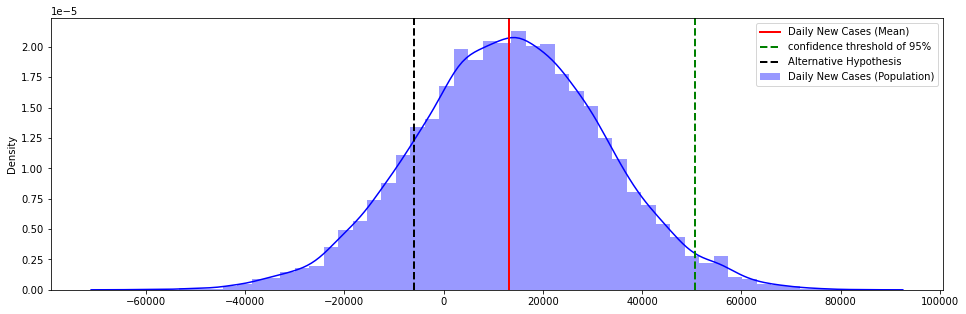

In [79]:
cases_daily_1 = np.random.normal(cases_daily.cases.mean(), cases_daily.cases.std(), 10000)

ci = stats.norm.interval(0.95, cases_daily.cases.mean(), cases_daily.cases.std())

plt.figure(figsize=(16,5))
sns.distplot(cases_daily_1, label='Daily New Cases (Population)', color='blue')
plt.axvline(cases_daily.cases.mean(), color='red', linewidth=2, label='Daily New Cases (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(cases_daily_1.mean() + t_stat*cases_daily_1.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Berdasarkan hasil pengujian yang diperoleh nilai p-value > 0.05 dan pada gambar distribusi diatas garis Alternative hypotesis berada didalam confident threshold 95% maka H0 fail to reject, artinya dalam setahun terakhir jumlah kasus baru harian tidak mengalami penurunan yang signifikan.

## one sample two tailed test

jadi hipotesis yang akan diuji

H0 : μ = 14000

H1 : μ != 14000

In [73]:
t_stat,p_val = stats.ttest_1samp(cases_daily.cases, 500)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 1.517592912419853e-53
t-statistics: 16.95207245913159


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


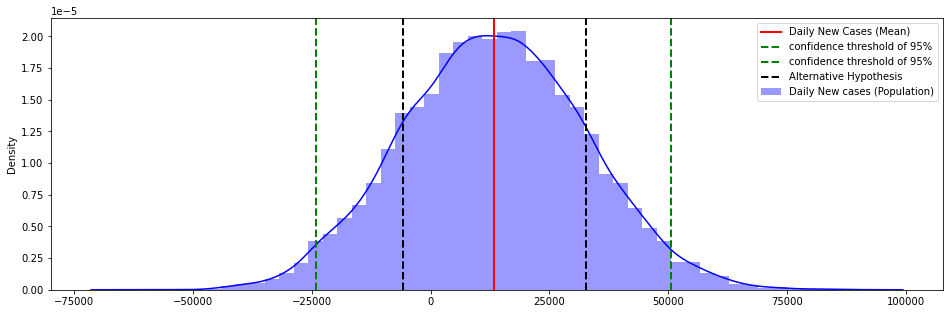

In [80]:
cases_daily_1 = np.random.normal(cases_daily.cases.mean(), cases_daily.cases.std(), 10000)

ci = stats.norm.interval(0.95, cases_daily.cases.mean(), cases_daily.cases.std())

plt.figure(figsize=(16,5))
sns.distplot(cases_daily_1, label='Daily New cases (Population)', color='blue')
plt.axvline(cases_daily.cases.mean(), color='red', linewidth=2, label='Daily New Cases (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(cases_daily_1.mean() + t_stat*cases_daily_1.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(cases_daily_1.mean() - t_stat*cases_daily_1.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Setelah dilakukan pengujian dengan 2-tailed test, hasil yang diperoleh sama dengan pada 1-tailed test. Perbedaannya adalah pada 2-tailed test nilai p-value tidak dibagi. Jadi H0 fail to reject.

## Two Samples Independent Two Tailed Hypothesis Testing

In [82]:
data1['Location'].unique()

array(['DKI Jakarta', 'Indonesia', 'Riau', 'Jawa Barat', 'Banten',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

Selanjutnya, untuk melihat kasus baru harian dari DKI jakarta dan Sulawesi Selatan, apakah memiliki perbedaan yang signifikan atau tidak. Pengujian menggunakan 2 sampel independent 

In [83]:
# groupby untuk wilayah DKI Jakarta dan menampilkan rata-rata kasus baru harian
daily_jkt = data1[data1['Location']=='DKI Jakarta'][['Date','cases']].groupby('Date').sum()
print('Rata-rata kasus baru harian di DKI Jakarta: {}'.format(np.round(daily_jkt.cases.mean())))

# groupby untuk wilayah Sulawesi Selatan dan menampilkan rata-rata kasus baru harian
daily_sulsel = data1[data1['Location']=='Sulawesi Selatan'][['Date','cases']].groupby('Date').sum()
print('Rata-rata kasus baru harian di DKI Jakarta: {}'.format(np.round(daily_sulsel.cases.mean())))

Rata-rata kasus baru harian di DKI Jakarta: 1346.0
Rata-rata kasus baru harian di DKI Jakarta: 176.0


Jadi hipotesis yang akan di uji:

H0 : μ_jkt = μ_sulsel

H1 : μ_jkt != μ_sulsel

In [84]:
# melihat nilai p-value dan t-stat
t_stat, p_val = stats.ttest_ind(daily_jkt,daily_sulsel)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])

P-value: 8.48632198850911e-38
t-statistics: 13.285230317292863


melihat distribusi populasi dari DKI Jakarta dan Sulawesi Selatan

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


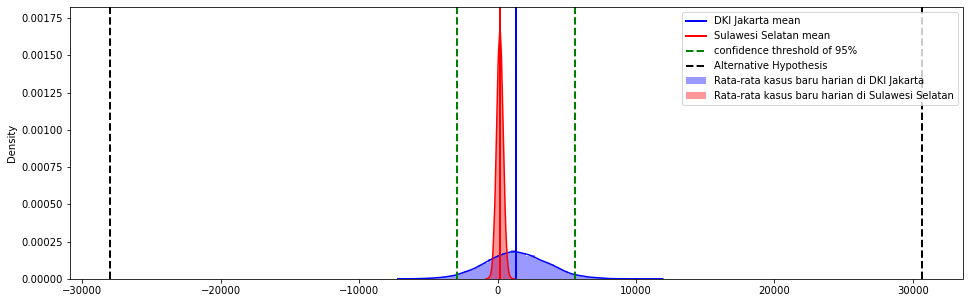

In [85]:
daily_jkt_1 = np.random.normal(daily_jkt.cases.mean(),daily_jkt.cases.std(),10000)
daily_sulsel_1 = np.random.normal(daily_sulsel.cases.mean(),daily_sulsel.cases.std(),10000)

ci = stats.norm.interval(0.95, daily_jkt.cases.mean(), daily_jkt.cases.std())
plt.figure(figsize=(16,5))
sns.distplot(daily_jkt_1, label='Rata-rata kasus baru harian di DKI Jakarta',color='blue')
sns.distplot(daily_sulsel_1, label='Rata-rata kasus baru harian di Sulawesi Selatan',color='red')

plt.axvline(daily_jkt.cases.mean(), color='blue', linewidth=2, label='DKI Jakarta mean')
plt.axvline(daily_sulsel.cases.mean(), color='red',  linewidth=2, label='Sulawesi Selatan mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(daily_jkt_1.mean()+t_stat[0]*daily_jkt_1.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_jkt_1.mean()-t_stat[0]*daily_jkt_1.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan hasil pengujian yang dilakukan, nilai p-value < 0.05 dan pada gambar distribusi diatas kedua garis Alternative hypotesis berda di luar confident threshold 95% maka H0 di reject, artinya jumlah kasus baru harian di DKI Jakarta memiliki perbedaan yang signifikan dengan daerah sulawesi.